# Сборный проект 1. Анализ игровой индустрии

Описание проекта: 


Интернет-магазином «Стримчик», специализирующийся на компютерных играх, планирует рекламную кампанию на 2017 г. 

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Опираясь на уже имеющиеся данные выявить закономерности,  определяющие успешность игры. Этот анализ позволит определить потенциально популярный продукт и спланировать рекламные кампании.  


Цель:  
Определить потенциально популярный продукт для планирования рекламной кампании на 2017.  

Задачи:  

1. Проработка представленных данных  
2. Анализ данных  
2. Составить портрет пользователя каждого региона  
3. Проверьте гипотезы  

Описание данных:  
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.    

Примечания Рейтинг от организации ESRB.  
«EC» («Early childhood») — «Для детей младшего возраста»  
«E» («Everyone») — «Для всех»  
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»  
«T» («Teen») — «Подросткам»  
«M» («Mature») — «Для взрослых»  
«AO» («Adults Only 18+») — «Только для взрослых»  
«RP» («Rating Pending») — «Рейтинг ожидается»  

## Подготовка данных

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as st
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.isna().sum().sort_values(ascending = False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

In [6]:
df.isna().sum().sort_values(ascending = False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

Таблица:  

Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB  

При предварительном расмотре данных, выяввлено, что необходимо изменить: 

- переименование загоровка - приведение к строчным 
- изменение типа данных   
Year_of_Release —  изменить на datetime64  
User_Score  - изменить на float64

- работа с пропусками(анализ, заполнение при необходимости), выявлено количество пропусков:  
critic_score- 8578  
rating - 6766  
user_score - 6701  
year_of_release - 269  
name - 2  
genre - 2  

- расчет суммарных продаж во всех регионах.  

### Преобразование данных 

In [7]:
df.columns = df.columns.str.lower() #заголовки - все строчные

In [8]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
df[(df['name'].isnull()) & (df['genre'].isnull())] #поиск пропущенных значений

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В столбце name и genre имеются пропуски, которые заменить невозможно, оптимально - удалить.

In [10]:
df = df.dropna(subset=['name']) #удаление пропущенных значений 

In [11]:
df[(df['name'].isnull()) & (df['genre'].isnull())] #проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [12]:
unik_years=df['year_of_release'].unique() # просмотр пропуска в дате
unik_years

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [13]:
df['year_of_release'].isna().sum()

269

In [14]:
miss_df = df.isna().sum() / len(df)
miss_df.sort_values(ascending = False)

critic_score       0.513133
rating             0.404715
user_score         0.400826
year_of_release    0.016095
name               0.000000
platform           0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
dtype: float64

В столлбце year_of_release всего 269 пропусков, что составляет  около 2 % от общего количества, считаю, что оптимальным будет удалить.

In [15]:
df.dropna(subset = ['year_of_release'], inplace = True) 

In [16]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [18]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце user_score встречается аббревиатура tbd от английского To Be Determined (будет определено) или To Be Decided (будет решено).Ааббревиатура обычно используется, если какая-то информация еще не определена или решение по вопросу не принято. Т.е. предпочтительнее tbd заменить на пропуск, без какой-либо замены.

In [19]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan #удаление исказит результаты, замена

In [20]:
df['user_score'] = df['user_score'].fillna(0)

In [21]:
df['critic_score'] = df['critic_score'].fillna(-1)

In [22]:
df['rating'] = df['rating'].fillna('undefined')

In [23]:
df['user_score'] = df['user_score'].astype('float')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [25]:
df['regional_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [26]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,regional_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,0.0,undefined,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,0.0,undefined,31.38


In [27]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-------------------------')
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  regional_sales   16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name : кол-

## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы? Важны ли данные за все периоды?

In [28]:
games = df.pivot_table(index='name', values='year_of_release', aggfunc = ('sum'))

Text(0, 0.5, 'Количество игр (млн.копий)')

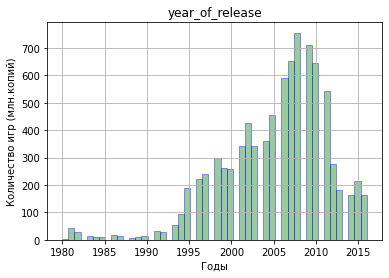

In [29]:
games.hist(bins=50, range=(1980,2016), ec='blue', alpha = 0.4, color='green')

plt.xlabel('Годы')
plt.ylabel('Количество игр (млн.копий)')

Действительно, не все года нужны при анализе. Наблюдается "бум" в пробазах, развитии индустрии после 1995 гг. 

### Как менялись продажи по платформам? За какой характерный срок появляются новые и исчезают старые платформы?

In [30]:
platform_sales = df.pivot_table('regional_sales', index = 'platform', aggfunc = 'sum').sort_values(by = 'regional_sales', ascending = False)

In [31]:
platform_sales.head(10)

,regional_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


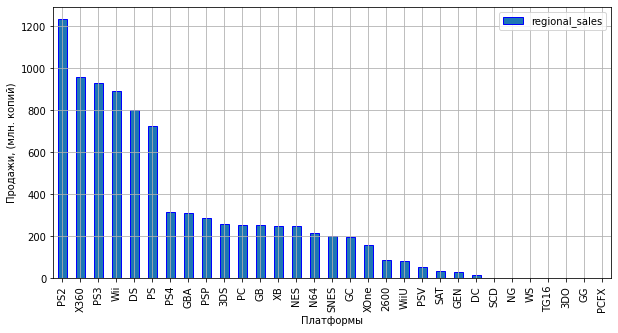

In [32]:
platform_sales.plot(kind='bar',figsize=(10, 5), grid=True, ec='blue')
plt.ylabel('Продажи, (млн. копий)')
plt.xlabel('Платформы')
plt.show()

 Из паредставленных данных выделены лидеры по продажам - первые 10 платформ. 

In [33]:
the_best_platform = platform_sales.head(10).index.to_list()
the_best_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

In [34]:
top_platform = df.query('platform in @the_best_platform').pivot_table(index='year_of_release', 
                                                                            columns='platform', 
                                                                            values='regional_sales', 
                                                                            aggfunc='sum')

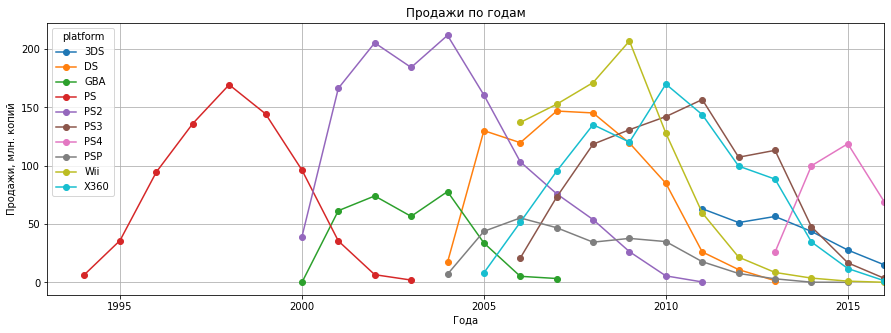

In [35]:
top_platform.plot(grid=True, figsize=(15, 5), style ='o-') #смотрим жизненный цикл по платформам
plt.xlim(1993, 2016)
plt.title('Продажи по годам')
plt.ylabel('Продажи, млн. копий')
plt.xlabel('Года')
plt.show()

Видим, что "жизнь" популярности игр на разных платформах примерно 10 лет, при этом наблюдается рост, пик, и спад. Некоторым платформам удается повторить успех за жизненный цикл, а некоторым нет. Считать актуальным периодом на мой взгляд стоит последние 5 лет по выгрузке. "бум" индутрии приходистся на период с 2000 гг., жизненный цикл платформ 10 лет (берем 5, оптимальное с периода подъема, до периода спада) т.е. оптимальным будет с 2011 по 2016 гг. 

In [36]:
top_platform_new = df.query('year_of_release >=2012')

### Какие платформы лидируют по продажам, растут или падают? 

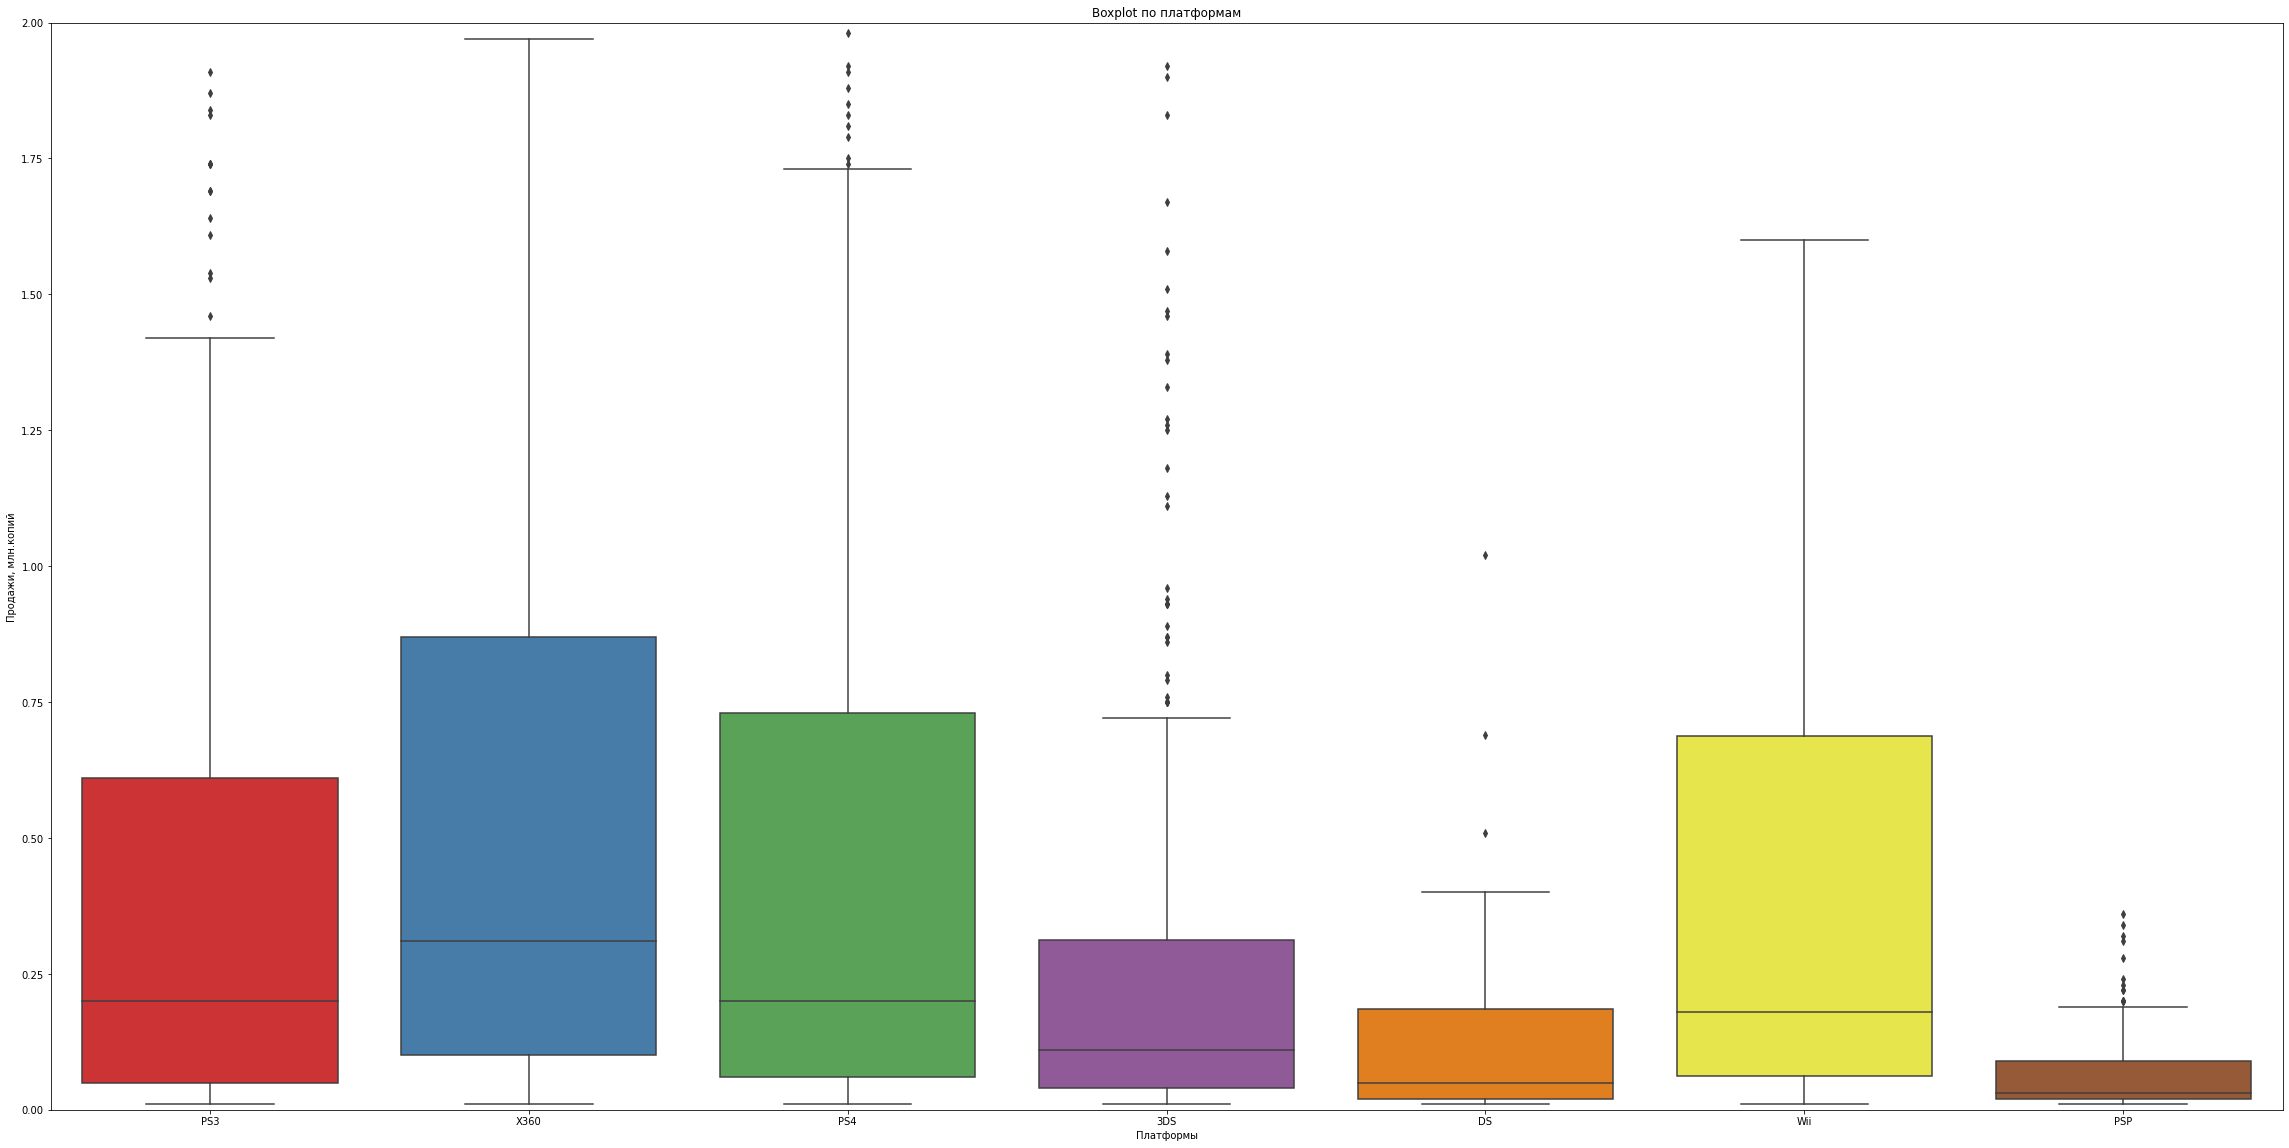

In [37]:
plt.figure(figsize=(40,20)) #строим ящик с усами для 10 лидеров 
box_all = sns.boxplot(x="platform", y="regional_sales", 
                      data= top_platform_new.query('platform in @top_platform'), 
                      palette="Set1")
box_all.set(ylim=(0,2))
plt.ylabel('Продажи, млн.копий')
plt.xlabel('Платформы')
plt.title('Boxplot по платформам')
plt.show()

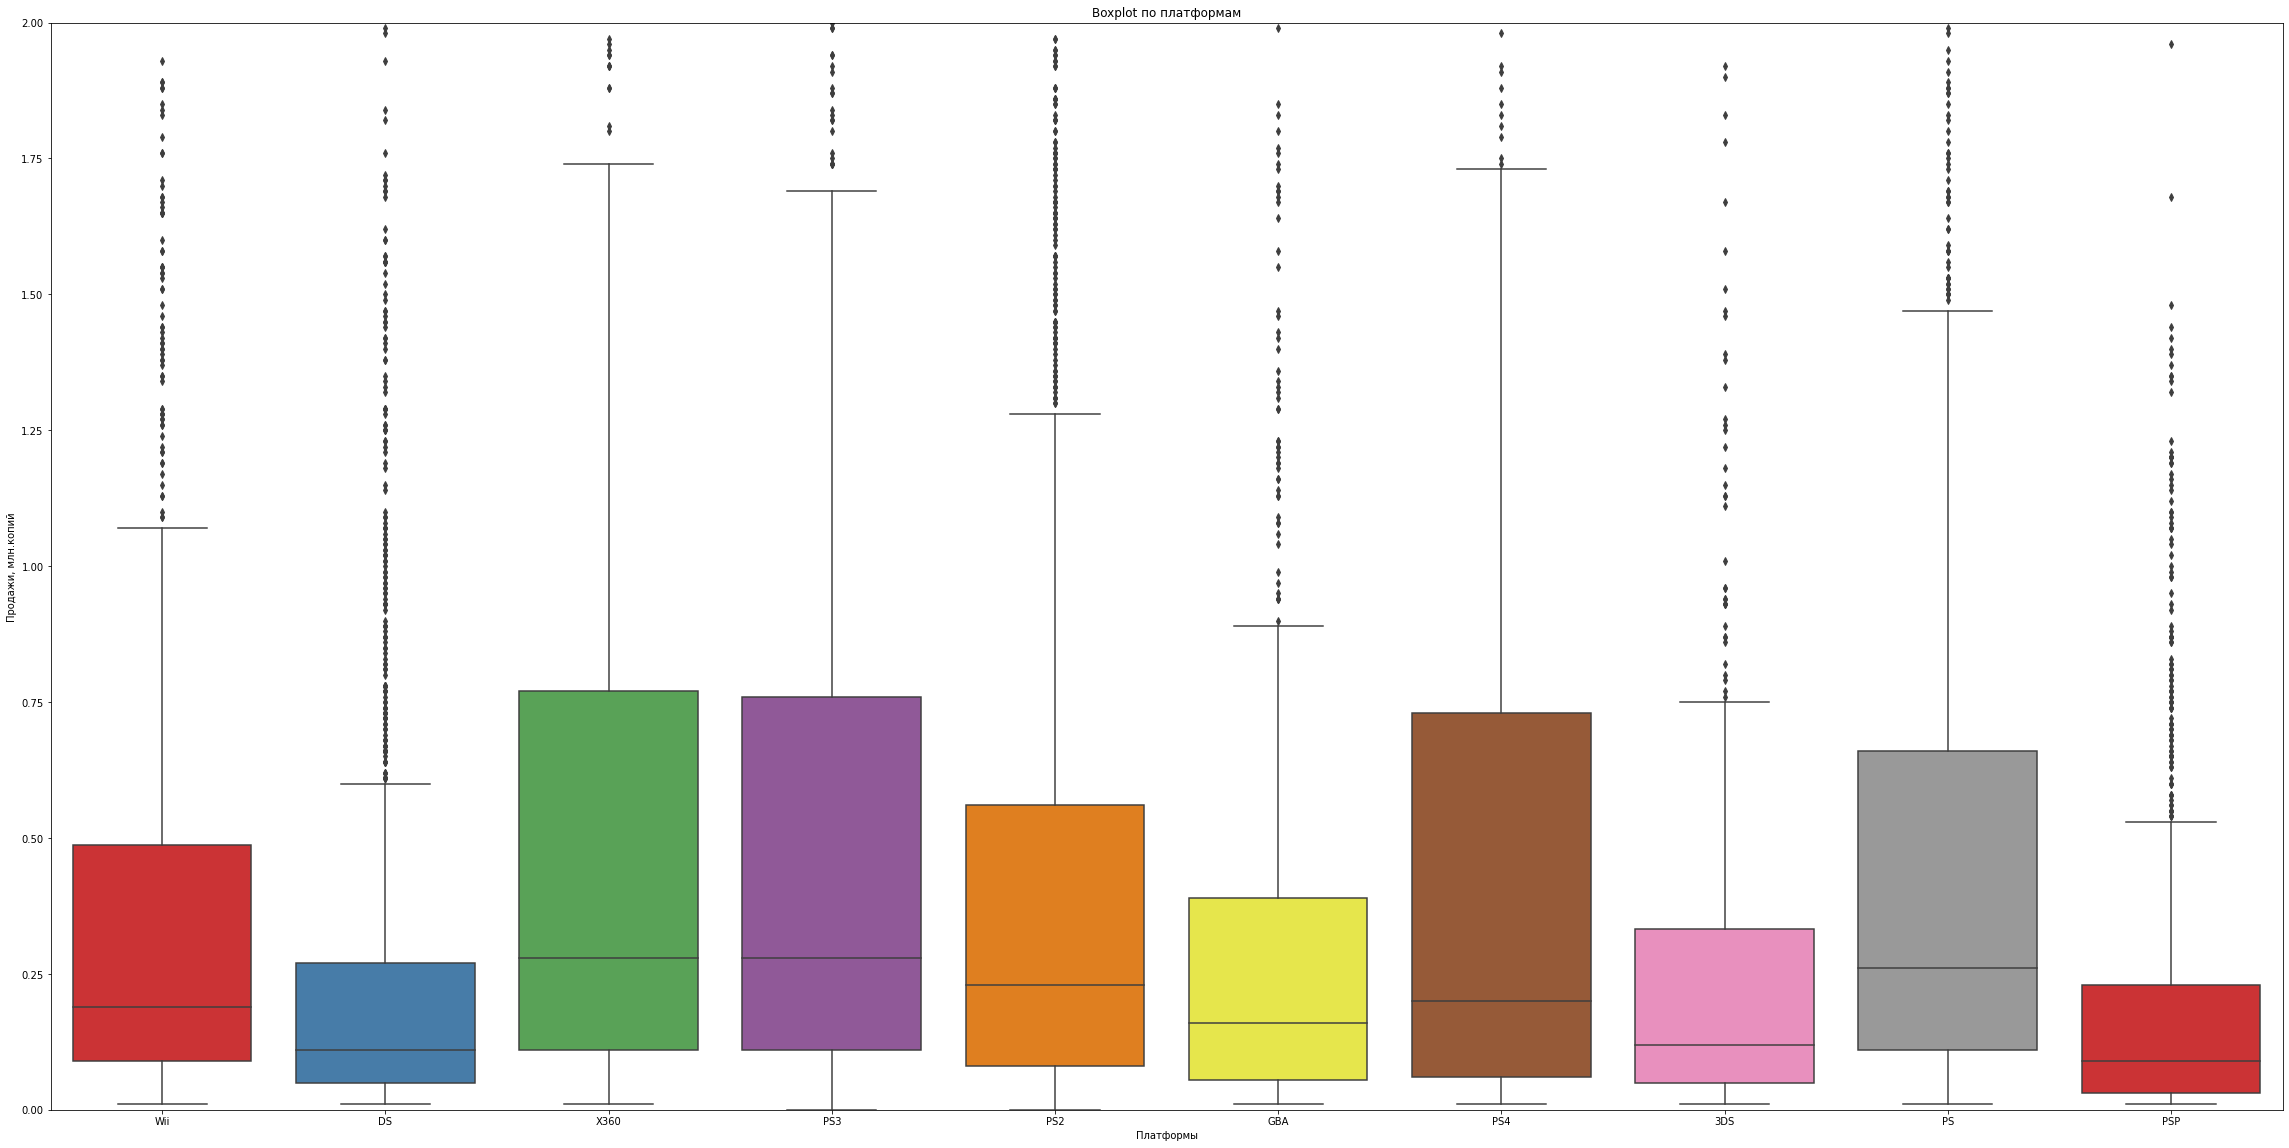

In [38]:
plt.figure(figsize=(40,20)) #строим ящик с усами для 10 лидеров 
box_all = sns.boxplot(x="platform", y="regional_sales", 
                      data= df.query('platform in @top_platform'), 
                      palette="Set1")
box_all.set(ylim=(0,2))
plt.ylabel('Продажи, млн.копий')
plt.xlabel('Платформы')
plt.title('Boxplot по платформам')
plt.show()

Разница между платформами очень велика, наблюдаются выбросы, для анализа Boxplot не удобен.


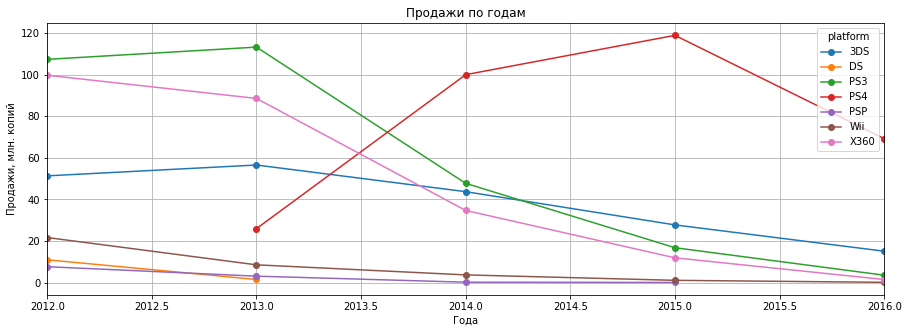

In [39]:
top_platform_new.query('platform in @the_best_platform').pivot_table(index='year_of_release',
                                                                         columns='platform', 
                                                                         values='regional_sales', 
                                                                         aggfunc='sum').plot(grid=True, figsize=(15, 5), style ='o-') #смотрим жизненный цикл по платформам
plt.xlim(2012, 2016)
plt.title('Продажи по годам')
plt.ylabel('Продажи, млн. копий')
plt.xlabel('Года')
plt.show()

К концу наблюдаемого периода наблюдается спад лидирующих до этого платформ PS3, X360. Наблюдаем в 2013 появление новых -  PS4 с набором оборотов или же небольшой рост и спад платформы 3DS. В целом к концу периода видим спад.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?  


Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

Смотрим зависимость по платформе PS3

In [40]:
platform_best_PS3 = top_platform_new.query('platform == "PS3" and user_score != 0') #находим корреляцию по одной из лидирующих платформ 
platform_best_PS3_loc = platform_best_PS3.loc[:, ['user_score','regional_sales']]
display(platform_best_PS3_loc.corr())

,user_score,regional_sales
user_score,1.000000,-0.005144
regional_sales,-0.005144,1.000000


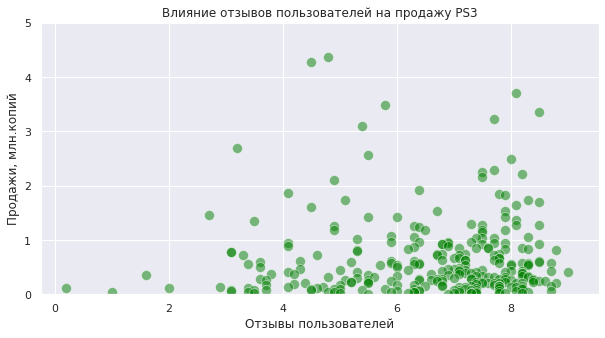

In [41]:
sns.set(rc={'figure.figsize':(10,5)}) #задаем размер графика
ax = sns.scatterplot(x="user_score", y="regional_sales", data= platform_best_PS3, 
                     alpha=0.5, color='green', s = 100)
ax.set(ylim=(0,5))
plt.ylabel('Продажи, млн.копий')
plt.xlabel('Отзывы пользователей')
plt.title('Влияние отзывов пользователей на продажy PS3')
plt.show()

Корреляция -0.005 - связи практически нет. Но судя по графику можно сделать вывод, что чем выше оценка, тем больше продаж.

In [42]:
platform_best_PS3 = top_platform_new.query('platform == "PS3" and critic_score != -1') #находим корреляцию по одной из лидирующих платформ 
platform_best_PS3_loc = platform_best_PS3.loc[:, ['critic_score','regional_sales']]
display(platform_best_PS3_loc.corr())

,critic_score,regional_sales
critic_score,1.000000,0.331497
regional_sales,0.331497,1.000000


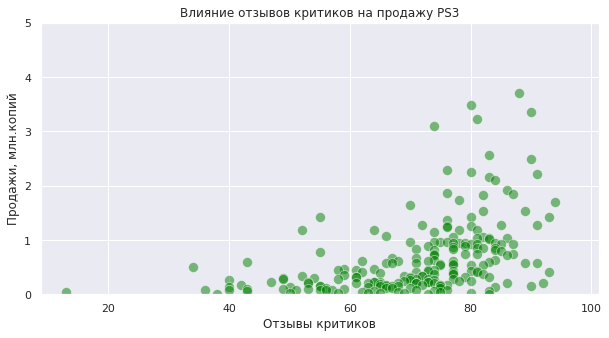

In [43]:
sns.set(rc={'figure.figsize':(10,5)}) #задаем размер графика
ax = sns.scatterplot(x="critic_score", y="regional_sales", data= platform_best_PS3, 
                     alpha=0.5, color='green', s = 100)
ax.set(ylim=(0,5))
plt.ylabel('Продажи, млн.копий')
plt.xlabel('Отзывы критиков')
plt.title('Влияние отзывов критиков на продажy PS3')
plt.show()

Корреляция 0.33 - связь сильнее, и также наблюдается рост продаж с увеличенем положительных отзывов критиков. 

In [44]:
platform_best_PS4 = top_platform_new.query('platform == "PS4" and user_score != 0') #находим корреляцию по одной из лидирующих платформ 
platform_best_PS4_loc = platform_best_PS4.loc[:, ['user_score','regional_sales']]
display(platform_best_PS4_loc.corr())


,user_score,regional_sales
user_score,1.000000,-0.031957
regional_sales,-0.031957,1.000000


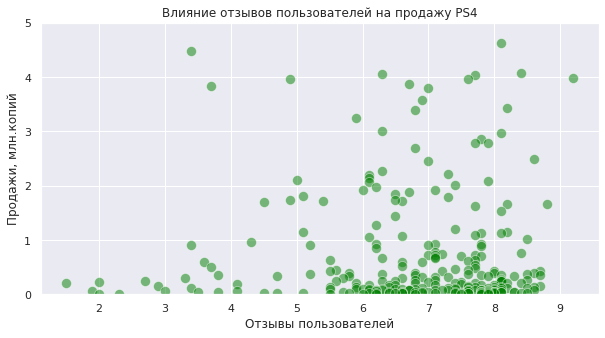

In [45]:
sns.set(rc={'figure.figsize':(10,5)}) #задаем размер графика
ax = sns.scatterplot(x="user_score", y="regional_sales", data= platform_best_PS4, 
                     alpha=0.5, color='green', s = 100)
ax.set(ylim=(0,5))
plt.ylabel('Продажи, млн.копий')
plt.xlabel('Отзывы пользователей')
plt.title('Влияние отзывов пользователей на продажy PS4')
plt.show()

Корреляция отрицательная -0.03 - связь отсутствует. Мнение пользывателей по данной платформе не влияет на продажи.

In [46]:
platform_best_PS4 = top_platform_new.query('platform == "PS4" and critic_score != -1') #находим корреляцию по одной из лидирующих платформ 
platform_best_PS4_loc = platform_best_PS4.loc[:, ['critic_score','regional_sales']]
display(platform_best_PS4_loc.corr())


,critic_score,regional_sales
critic_score,1.000000,0.406568
regional_sales,0.406568,1.000000


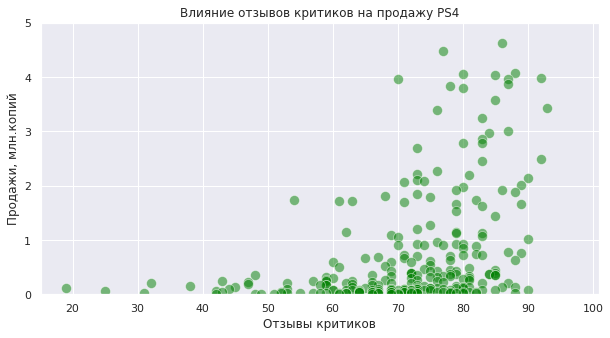

In [47]:
sns.set(rc={'figure.figsize':(10,5)}) #задаем размер графика
ax = sns.scatterplot(x="critic_score", y="regional_sales", data= platform_best_PS4, 
                     alpha=0.5, color='green', s = 100)
ax.set(ylim=(0,5))
plt.ylabel('Продажи, млн.копий')
plt.xlabel('Отзывы критиков')
plt.title('Влияние отзывов критиков на продажy PS4')
plt.show()

Корреляция 0.40 - связь гораздо силнее, чем от озывов пользователей, наблюдается рост продаж с увеличенем положительных отзывов критиков.

Смотрим зависимость по платформе X360

In [48]:
platform_best_X360 = top_platform_new.query('platform == "X360" and user_score != 0') #находим корреляцию по одной из лидирующих платформ 
platform_best_X360_loc = platform_best_X360.loc[:, ['user_score','regional_sales']]
display(platform_best_X360_loc.corr())

,user_score,regional_sales
user_score,1.000000,0.006164
regional_sales,0.006164,1.000000


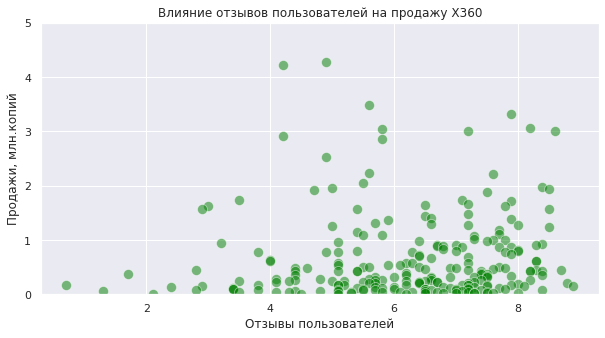

In [49]:
sns.set(rc={'figure.figsize':(10,5)}) #задаем размер графика
ax = sns.scatterplot(x="user_score", y="regional_sales", data= platform_best_X360, 
                     alpha=0.5, color='green', s = 100)
ax.set(ylim=(0,5))
plt.ylabel('Продажи, млн.копий')
plt.xlabel('Отзывы пользователей')
plt.title('Влияние отзывов пользователей на продажy X360')
plt.show()

Корреляция 0.006 - связь минимальна. Но судя по графику можно сделать вывод, что чем выше оценка, тем больше продаж.

In [50]:
platform_best_X360 = top_platform_new.query('platform == "X360" and critic_score != -1') #находим корреляцию по одной из лидирующих платформ 
platform_best_X360_loc = platform_best_X360.loc[:, ['critic_score','regional_sales']]
display(platform_best_X360_loc.corr())

,critic_score,regional_sales
critic_score,1.000000,0.360573
regional_sales,0.360573,1.000000


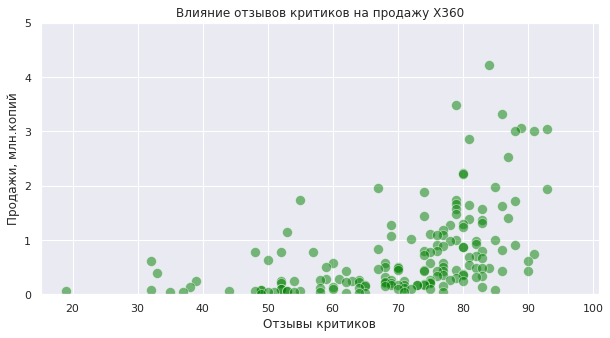

In [51]:
sns.set(rc={'figure.figsize':(10,5)}) #задаем размер графика
ax = sns.scatterplot(x="critic_score", y="regional_sales", data= platform_best_X360, 
                     alpha=0.5, color='green', s = 100)
ax.set(ylim=(0,5))
plt.ylabel('Продажи, млн.копий')
plt.xlabel('Отзывы критиков')
plt.title('Влияние отзывов критиков на продажy X360')
plt.show()

Корреляция 0.36 - отзывы критиков плияют сельнее, чем отзывы пользователей, по графику можно сделать вывод, что чем выше оценка, тем больше продаж.

Рассмтрев данные по трем популярным платформам, можно сделать вывод, что влияние отзывов пользователей влияет в меньшей степени на продажи, чем влияние отзывов критиков. По графикам мы видим, что, чем больше отзывов, тем выше продажи. 

### Распределение игр по жанрам. 

 Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими
продажами?

In [52]:
# сделаем сводную по жанрам 
genre_pivot = top_platform_new.pivot_table('regional_sales', 
                index = 'genre', 
                aggfunc = ['sum','count','mean', 'median'])
                           
genre_pivot

,sum,count,mean,median
,regional_sales,regional_sales,regional_sales,regional_sales
genre,,,,
Action,441.12,1031,0.427856,0.120
Adventure,29.43,302,0.097450,0.030
Fighting,44.49,109,0.408165,0.130
Misc,85.04,192,0.442917,0.120
Platform,61.00,85,0.717647,0.210
Puzzle,4.89,28,0.174643,0.045
Racing,53.50,115,0.465217,0.140
Role-Playing,192.80,370,0.521081,0.140


Видим, что по продажам лидирует жанр - Action. Далее идут Shooter и  Sports, а на последнем месте Puzzle	

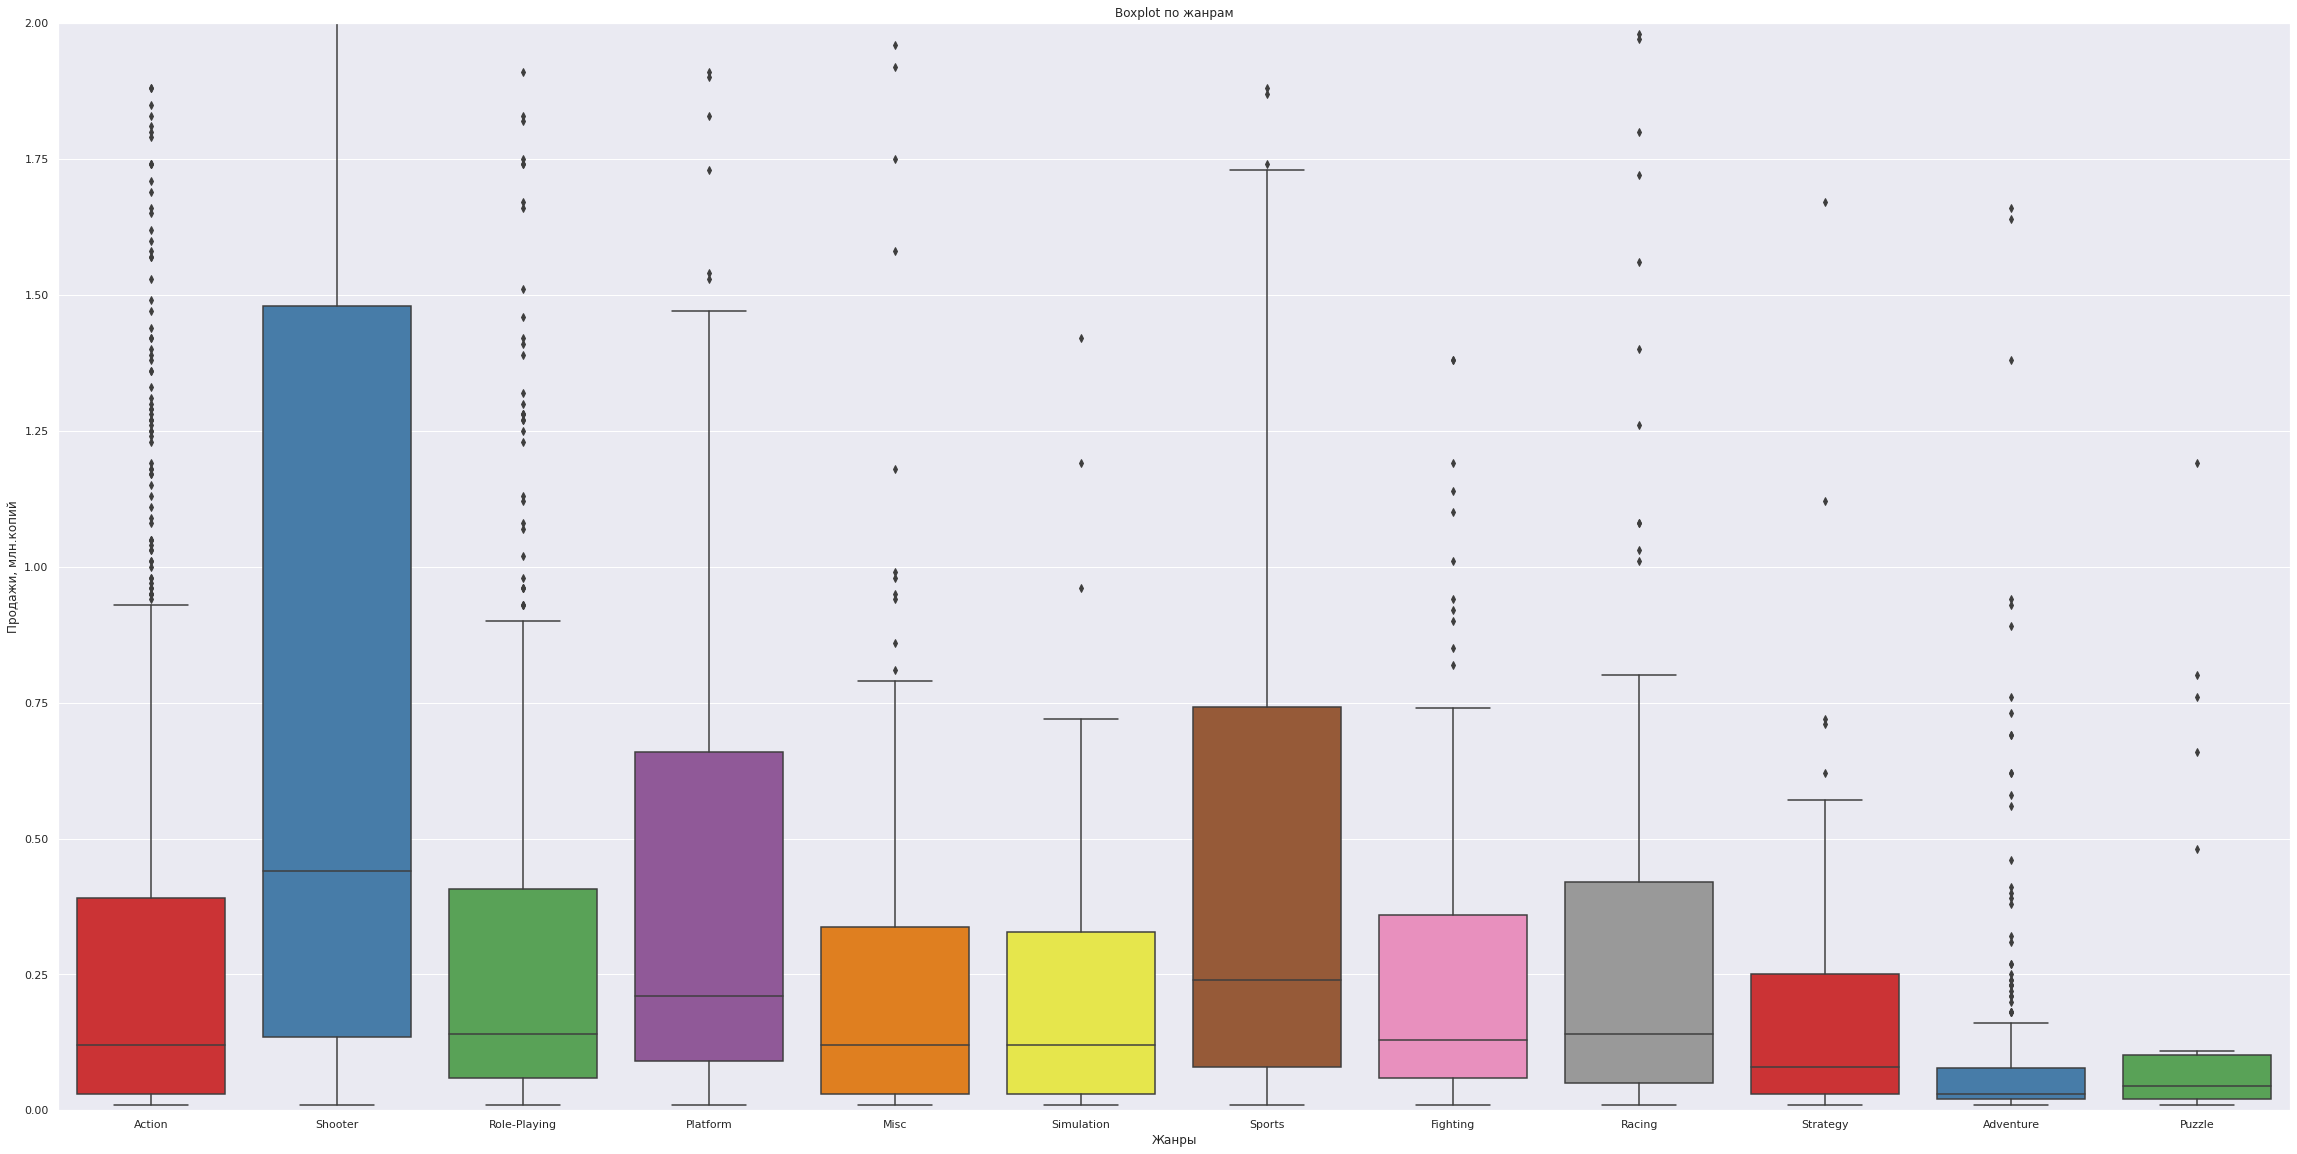

In [53]:
plt.figure(figsize=(40,20)) #строим ящик с усами для 10 лидеров 
box_genre = sns.boxplot(x="genre", y="regional_sales", 
                      data= df.query('year_of_release >=2012'), 
                      palette="Set1")
box_genre.set(ylim=(0,2))
plt.ylabel('Продажи, млн.копий')
plt.xlabel('Жанры')
plt.title('Boxplot по жанрам')
plt.show()

In [54]:
top_platform_new.groupby('genre')['regional_sales'].median().sort_values(ascending = False)

genre
Shooter         0.440
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Action          0.120
Misc            0.120
Simulation      0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: regional_sales, dtype: float64

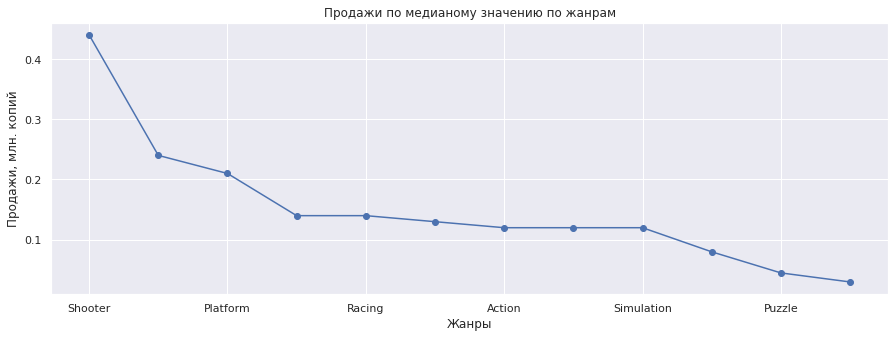

In [55]:
top_platform_new.groupby('genre')['regional_sales'].median().sort_values(ascending = False).plot(grid=True, figsize=(15, 5), style ='o-') 

plt.title('Продажи по медианому значению по жанрам')
plt.ylabel('Продажи, млн. копий')
plt.xlabel('Жанры')
plt.show()

Анализ игр по жанрам не должен ограничиваться максимальным и минимальным значением. Определено, что рейтинг жанра, основанный на маскимальных продажах некорректен, т.к. в данных могут быть выбросы, влияющие на результат. Предположительно, появление аномалий  по жанрам связано с активной рекламной компании на платформе определенного жанра или специализацией платформы на определнном жанре или техническими возможностими платформы для запуска определенного жанра. Так, опараясь на максимальные продажы видим, что лидирующие позиции у: Action (441.12),Shooter (304.73) и Role-Playing (192.80). 

Если рассмартивать медианое значение, то лидеры меняются: Shooter, Sports и Platform 


### Портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):  
Самые популярные платформы (топ-5). Опишите различия в долях продаж.  
Самые популярные жанры (топ-5). Поясните разницу.  
Влияет ли рейтинг ESRB на продажи в отдельном регионе? 

In [56]:
#список регионов
#NA_sales — продажи в Северной Америке 
#EU_sales — продажи в Европе 
#JP_sales — продажи в Японии 
regions = ['na_sales','eu_sales','jp_sales', 'other_sales']
df_since_2012 = df.query('year_of_release >= 2012') 
df_since_2012.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,regional_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,0.0,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,-1.0,0.0,undefined,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


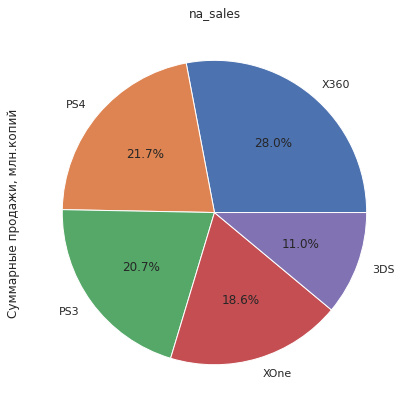

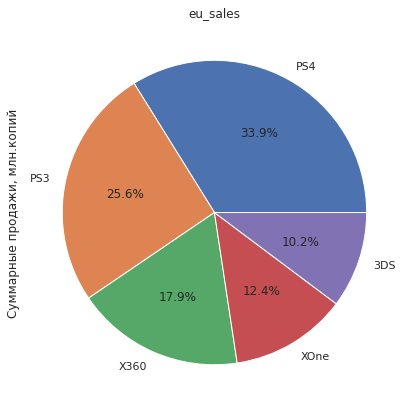

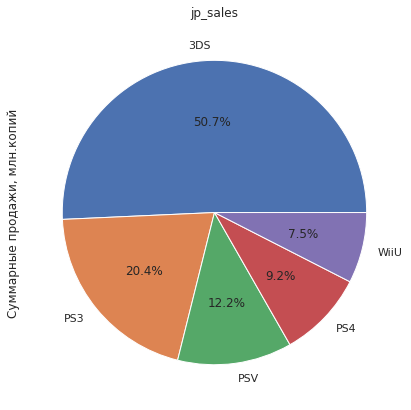

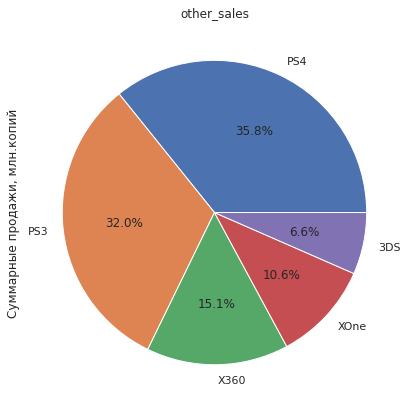

In [57]:
# цикл для быстрого вывода для каждого региона
for reg in regions:
    (df_since_2012.pivot_table(index='platform', values=reg, aggfunc='sum')
                .sort_values(reg, ascending=False).head(5)
                .plot(kind='pie', y=reg, figsize=(7, 7), legend=False, title = reg, autopct='%1.1f%%')
                .set(ylabel='Суммарные продажи, млн.копий')
    )


Выделим тройку лидеров по регионам. В Северной Америке лидируют X360, Wii, PS3. В Европе - PS3, X360 и Wii. В Японии - DS,3DS и PS3. В других регионах лидирует PS4, PS3 и X360. В каждом регионе с разными позициями присутствует платформа PS3.

In [58]:
df_since_2012.pivot_table(index='genre', values=regions, aggfunc= 'sum')

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Action,159.34,52.80,177.84,51.14
Adventure,9.46,8.24,8.92,2.81
Fighting,10.79,9.44,19.79,4.47
Misc,26.32,12.86,38.19,7.67
Platform,21.41,8.63,25.38,5.58
Puzzle,1.40,2.14,1.13,0.22
Racing,27.29,2.50,17.22,6.49
Role-Playing,48.53,65.44,64.00,14.83
Shooter,113.47,9.23,144.77,37.26


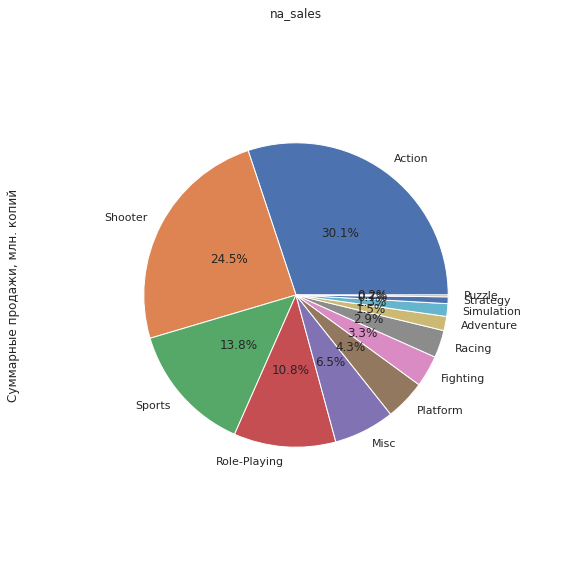

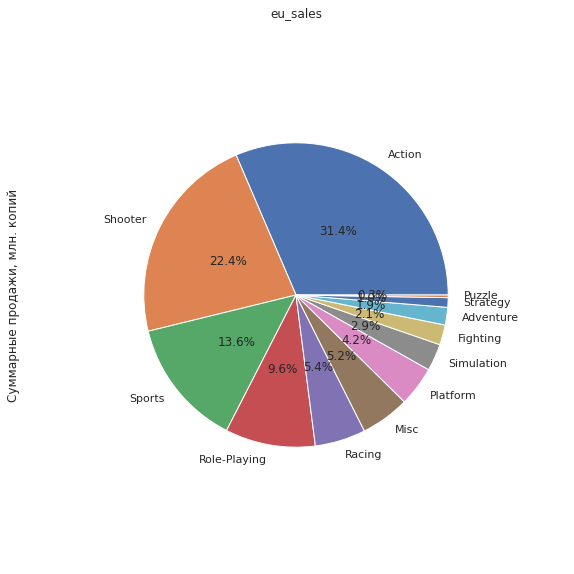

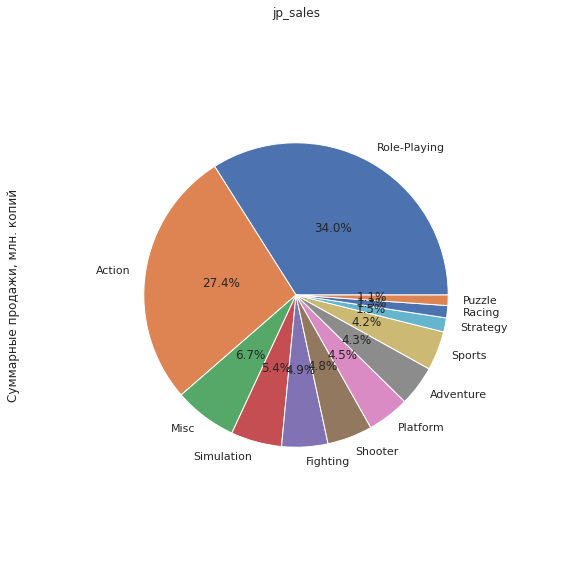

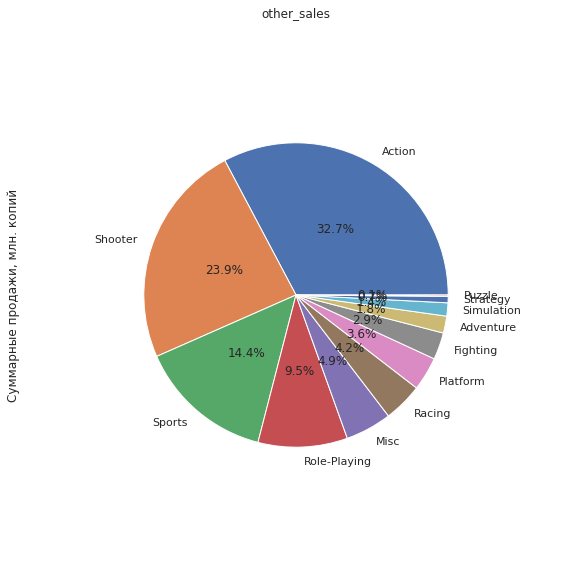

In [59]:
for reg in regions:
    (df_since_2012.pivot_table(index='genre', values=reg, aggfunc='sum')
                .sort_values(reg, ascending=False)
                    .plot(kind='pie', y=reg, figsize=(10, 10), legend=False, pctdistance=0.5, 
                      labeldistance=1.1, radius=0.7, title = reg, autopct='%1.1f%%')
                .set(ylabel='Суммарные продажи, млн. копий'))
    plt.show() 

Инетресны предпочтения играков по жанрам в разных регионах. Выделяется непохожестью в предпочтениях игроки Японии. Самы популярный жанр - Role-Playing (ролевая игра). в В Европе и Северной америке лидируют  Action.

In [60]:
#посмотрим уникальные значения
df_raiting = df['rating'].unique()
df_raiting

array(['E', 'undefined', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Рейтинг от организации ESRB.  
«EC» («Early childhood») — «Для детей младшего возраста»  
«E» («Everyone») — «Для всех»  
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»  
«T» («Teen») — «Подросткам»  
«M» («Mature») — «Для взрослых»  
«AO» («Adults Only 18+») — «Только для взрослых»  
«RP» («Rating Pending») — «Рейтинг ожидается»  
«K-A» - Для детей – для тех, кто уже научился говорить и держать джойстик

In [61]:
# новый список с расшифрованными названиями
new_raiting=['Для всех', 'undefined', 'Для взрослых', 'Подросток','Для всех от 10 лет и старше','Для детей – для тех, кто уже научился говорить и держать джойстик','Только для взрослых','Для детей младшего возраста','Рейтинг ожидается']
new_raiting

['Для всех',
 'undefined',
 'Для взрослых',
 'Подросток',
 'Для всех от 10 лет и старше',
 'Для детей – для тех, кто уже научился говорить и держать джойстик',
 'Только для взрослых',
 'Для детей младшего возраста',
 'Рейтинг ожидается']

In [62]:
#замену значений в столбце 
df['rating'] = df['rating'].replace(df_raiting, new_raiting)
print(df['rating'].unique())

['Для всех' 'undefined' 'Для взрослых' 'Подросток'
 'Для всех от 10 лет и старше'
 'Для детей – для тех, кто уже научился говорить и держать джойстик'
 'Только для взрослых' 'Для детей младшего возраста' 'Рейтинг ожидается']


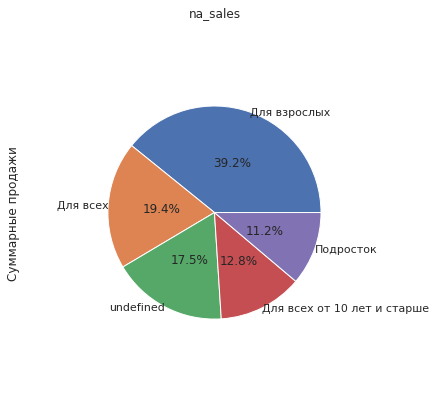

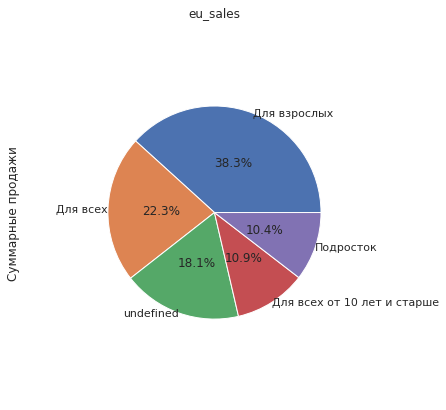

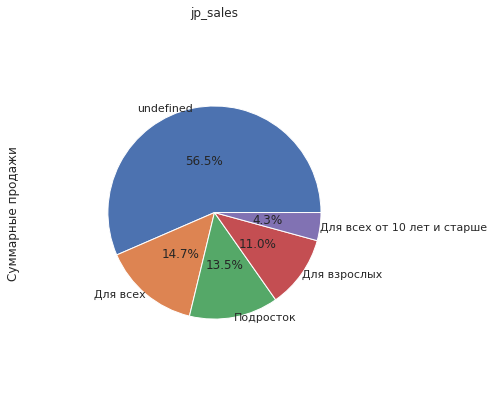

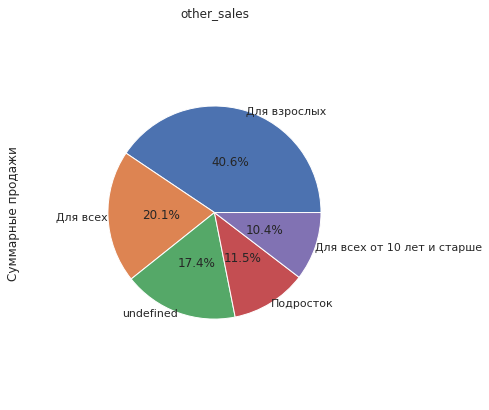

In [63]:
#NA_sales — продажи в Северной Америке 
#EU_sales — продажи в Европе 
#JP_sales — продажи в Японии 
rating_actual= df.query('rating != "Рейтинг ожидается" and year_of_release >= 2012')
for reg in regions:
    (rating_actual.pivot_table(index='rating', values=reg, aggfunc='sum')
                .sort_values(reg, ascending=False).head(5)
                .plot(kind='pie', y=reg, figsize=(7, 7), legend=False, pctdistance=0.5, 
                      labeldistance=1, radius=0.7, title = reg, autopct='%1.1f%%')
                .set(ylabel='Суммарные продажи')
    )
    plt.show()

По рейтингу  ESRB в Северной Америке и Европе и других регионах лидирующие позиции занимают игры 'Для взрослых', далее идут игры 'Для всех', на третьем месте позиция рейтинг не определен - 'undefined'.  В Японии ситуция отличается, на первом месте - 'undefined', далее 'Для всех', на третьем месте - 'Подросток'

Скорее всего,  выделение Японии из общего ряда обусловлено тем, что  рейтинг ESRB существует для США и Канады. Произведители Японского рынка игр не маркируют игры, которые не попадают на рынок в США и Канады. 

## Проверка гипотиз 

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [64]:
# пользовательские рейтинги платформ Xbox One 
user_score_xbox_one = df.query('platform == "XOne" and year_of_release >= 2012 and user_score != 0') 
# пользовательские рейтинги платформ  PC
user_score_pc = df.query('platform == "PC" and year_of_release >= 2012 and user_score != 0') 

In [65]:
var_xbox_one = np.var(user_score_xbox_one['user_score'])
var_pc = np.var(user_score_pc['user_score'])
print('Дисперсия платформ Xbox One :', var_xbox_one)
print('Дисперсия платформ PC :', var_pc )

Дисперсия платформ Xbox One : 1.8965188383045526
Дисперсия платформ PC : 2.7569952398906588


In [66]:
# Комментарий ревьюера
user_score_xbox_one.user_score.min(), user_score_xbox_one[user_score_xbox_one.user_score == 0].user_score.count()

(1.6, 0)

In [67]:
user_score_xbox_one['user_score'].mean()

6.521428571428572

In [68]:
user_score_pc['user_score'].mean()

6.4286407766990274

In [69]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    user_score_xbox_one['user_score'],
    user_score_pc['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Гипотезу H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Отвергнуть не получилось, а при "ручном" сравнении видим, что среднйе пользовательские рейтинги платформ Xbox One и PC очень близки.


Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные?



H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.  
H1: Средние пользовательские рейтинги жанров Action и Sport разные.

In [70]:
#выберем пользовательские рейтинги жанров Action и Sports
user_score_action = df.query('genre == "Action" and  year_of_release >= 2012 and user_score != 0') 
 
user_score_sports = df.query('genre == "Sports" and year_of_release >= 2012 and user_score != 0')  


In [71]:
var_action = np.var(user_score_action['user_score'])
var_sports = np.var(user_score_sports['user_score'])
print('Дисперсия жанра Action равна:', var_action)
print('Дисперсия жанра Sports равна:', var_sports)

Дисперсия жанра Action равна: 1.8854720340439224
Дисперсия жанра Sports равна: 3.0073882971729127


In [72]:
# Комментарий ревьюера
user_score_action.user_score.min(), user_score_action[user_score_action.user_score == 0].user_score.count()

(1.6, 0)

In [73]:
user_score_action['user_score'].mean()

6.825047801147227

In [74]:
user_score_sports['user_score'].mean()

5.455897435897437

In [75]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    user_score_action['user_score'],
    user_score_sports['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Гипотезу H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые - отвергаем, также это подтверждается ручным сравлением. Среднее значение рейтинга жанра  Action выше, чем среденее рейтинга Sports. 

## Вывод

Из проанализированных данных видим, что зарождение индустрии проходило в период  с  1990 по  1995. Рост наблюдается к периоду с  2000 гг. Самый "пик" приходится на 2012 г. Определила, что "жизненный цикл" платформ примерно 10 лет. За этот отрезок происходит: рост, пик, и спад. Некоторым платформам удается повторить успех за жизненный цикл, а некоторым нет.  

Зачастую, в современном мире мы ориентируемся и полагаемся при выборе чего-либо на мнение других пользователей. При этом большего доверия вызывает мнение эксперта. Игровая индустрия не исключение, но при рассмтрении значимых статистических показателей лидирующих платформ видим, что отзывы пользователей не влияют на продажи. Ситуация с отзывами критиков немного силнее, т.е наблюдается рост продаж с увеличенем положительных отзывов критиков, но определеющим фактором не назовешь.

При анализе выявлено, что предпочтения игроков из Японии отличны от других регионов. Самы популярный жанр в регионе - Role-Playing (ролевая игра). В Европе и Северной америке- лидируют  Action, Sports, Shooter.

По рейтингу от организации ESRB выявила, что он актуален для Северной америки и Европы, для Японии рейтинг не является определяющим.

В поцессе исследования были сформированы 2 гипотезы и было определено, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а при "ручном" сравнении видно, они очень близки. Средние пользовательские рейтинги жанров Action и Sports не одиноковы,  это подтверждается ручным сравлением. Среднее значение рейтинга жанра  Action выше, чем среденее рейтинга Sports. 


На основании проанализированных данных для рекламной кампании следует учесть:  
1. Заложить 2 направления для рекламы: Для пользователей Северной америки, Европы и других регионов и отдельно для Японии.  
2. Для пользователей кроме Японии рекламу ориентировать для платформы PS4. Для Японии платформа - 3DS.  
3. Приоритетные жанры кроме Японии Shooter Action, Sports для Японии Role-Playing и Action.  
4. По рейтингу ESRB кроме Японии реклама должна быть ориентирована на 'Для всех', 'Для взрослых'. Для Японии, если учитывать рейтинг, то с маркировкой - 'Для всех', 'Подросток' и 'Для взрослых', но стоит отдельно заложить на 'undefined'